# Non supervised learning

## Autoencoders

Suppose we have only a set of unlabeled training examples $x_1,x_2,x_3, \dots $, where $x_i \in \Re^n$. 

An autoencoder neural network is an *unsupervised learning* algorithm that applies backpropagation and uses a loss function that is optimal when setting the target values to be equal to the inputs, $y_i=x_i$.

If you want to know better how backpropagation works check this out: https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/


To build an autoencoder, you need three things: an **encoding function**, a **decoding function**, and a **distance function** between the amount of information loss between the compressed representation of your data and the decompressed representation.

<center>
<img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg" alt="" style="width: 700px;"/>
</center>

Two practical applications of autoencoders are data denoising, and dimensionality reduction for data visualization. n addition, it has shown to be an improvement over Matrix Factorization algorithms for Recommender Systems. 

Actually, Autoencoders are Neural Networks that learn efficient representations of data. With appropriate dimensionality and sparsity constraints, autoencoders can learn data projections that are more interesting than PCA or other basic techniques.


![texto alternativo](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-07-at-8.52.21-AM.png)

We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

## First we need to mount our Google Drive disk

# Let's prepare our input data. 

In [2]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


# Create a simple 1-hidden layer AE

Remember the steps:

 - build the model
 - compile
 - fit

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [5]:
# this is the size of our encoded representations       
encoding_dim = 6*6  # I'm using a squared number, so that we can see the hidden layer as an image

input_img = Input(shape=(784,))

# encoded representation of the input
encoding_layer = Dense(encoding_dim, 
                       activation='relu')
encoded = encoding_layer(input_img)

# lossy reconstruction of the input
decoding_layer = Dense(784, 
                       activation='sigmoid')
decoded = decoding_layer(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

print(autoencoder.summary())

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


autoencoder.fit(x_train, 
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                28260     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               29008     
Total params: 57,268
Trainable params: 57,268
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 4s 68us/step - loss: 0.3494 - val_loss: 0.2689
Epoch 2/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2595 - val_loss: 0.2464
Epoch 3/50
60

## Predict some images

Note that here `predict` does not mean to predict a label, but rather a forward pass trhough the network (i.e. inference)

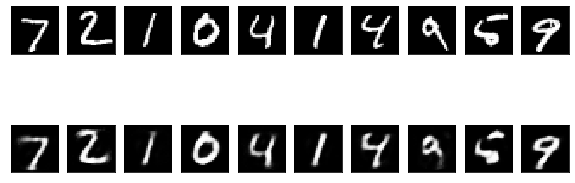

In [6]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Note that we can also create a separate encoder model and a separate decoder model

In [0]:
# this model maps an input to its encoded representation
encoding_model = Model(input_img, encoded)

# create a placeholder for an encoded input
# and create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoding_model = Model(encoded_input, decoding_layer(encoded_input))

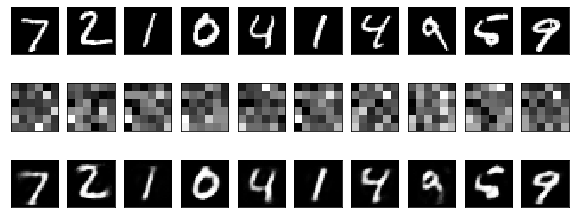

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoding_model.predict(x_test)
decoded_imgs = decoding_model.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display hidden layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(6, 6))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Try doing the same with larger hidden layers

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.3251 - val_loss: 0.2532
Epoch 2/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2366 - val_loss: 0.2186
Epoch 3/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2075 - val_loss: 0.1951
Epoch 4/50

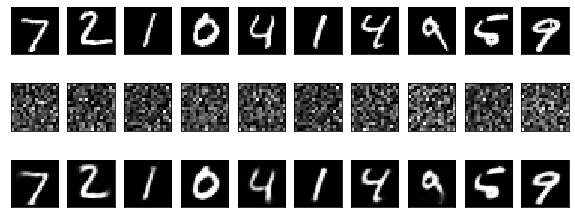

In [9]:
# this is the size of our encoded representations       
encoding_dim = 16*16  # 32 floats -> compression of factor 24.5, 
                   # assuming the input is 784 floats

input_img = Input(shape=(784,))

# encoded representation of the input
encoding_layer = Dense(encoding_dim, 
                       activation='relu')
encoded = encoding_layer(input_img)

# lossy reconstruction of the input
decoding_layer = Dense(784, 
                       activation='sigmoid')
decoded = decoding_layer(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

print(autoencoder.summary())

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, 
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# this model maps an input to its encoded representation
encoding_model = Model(input_img, encoded)

# create a placeholder for an encoded input
# and create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoding_model = Model(encoded_input, decoding_layer(encoded_input))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoding_model.predict(x_test)
decoded_imgs = decoding_model.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display hidden layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding a sparsity constraint on the encoded representations

In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. 

It's important to ensure that the autoencoder model is not simply learning an efficient way to memorize the training data. Similar to supervised learning problems, we can employ various forms of regularization to the network in order to encourage good generalization properties.

In Keras, this can be done by adding an ``activity_regularizer`` to our Dense layer:

In [10]:
from keras import regularizers

autoencoder.reset_states()

encoding_dim = 6*6

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-8))(input_img)
decoding_layer = Dense(784, 
                       activation='sigmoid')
decoded = decoding_layer(encoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', 
                    loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.3592 - val_loss: 0.2709
Epoch 2/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.2626 - val_loss: 0.2511
Epoch 3/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.2417 - val_loss: 0.2305
Epoch 4/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.2238 - val_loss: 0.2147
Epoch 5/15
60000/60000 [==============================] - 4s 62us/step - loss: 0.2095 - val_loss: 0.2015
Epoch 6/15
60000/60000 [==============================] - 4s 64us/step - loss: 0.1974 - val_loss: 0.1907
Epoch 7/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.1878 - val_loss: 0.1821
Epoch 8/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.1800 - val_loss: 0.1752
Epoch 9/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.1737 - val_loss: 0.1695
Epoch

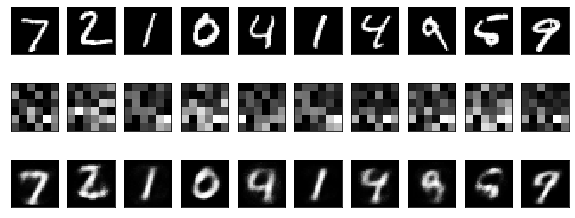

In [11]:
# this model maps an input to its encoded representation
encoding_model = Model(input_img, encoded)

# create a placeholder for an encoded input
# and create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoding_model = Model(encoded_input, decoding_layer(encoded_input))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoding_model.predict(x_test)
decoded_imgs = decoding_model.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display hidden layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(int(np.sqrt(encoding_dim)), int(np.sqrt(encoding_dim))))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Going deep

Compare the loss with the shallow case. Does it get any better?

In [12]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
print(autoencoder.summary())

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101

## Example: Image denoising

It's simple: we will train the autoencoder to map noisy digits images to clean digits images.

Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

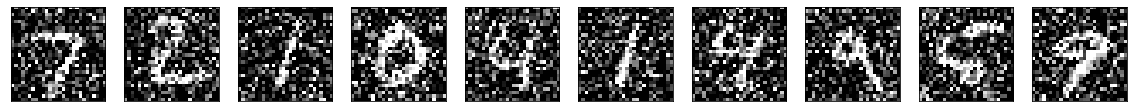

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(x_train_noisy, x_train, 
          epochs=20,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2710 - val_loss: 0.2133
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1921 - val_loss: 0.1753
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1685 - val_loss: 0.1613
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1585 - val_loss: 0.1540
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1518 - val_loss: 0.1482
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1469 - val_loss: 0.1438
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1433 - val_loss: 0.1408
Epoch 8/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1405 - val_loss: 0.1391
Epoch 9/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1380 - val_loss: 0.1366
Epoch

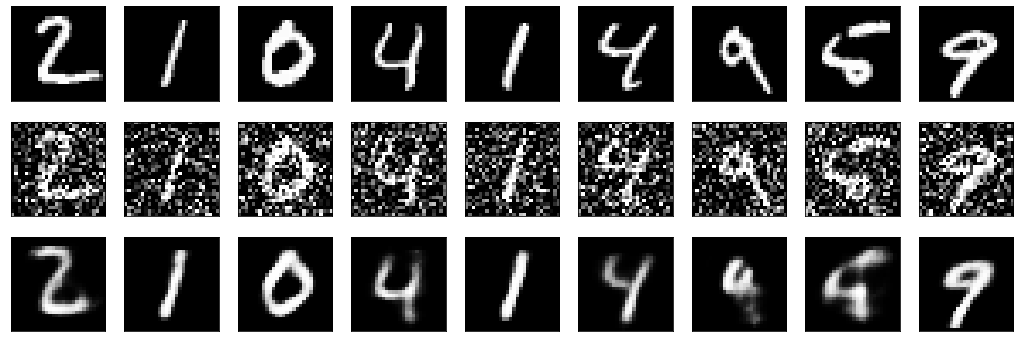

In [16]:
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With this approach, our model isn't able to simply develop a mapping which memorizes the training data because our input and target output are no longer the same

## Variational Autoencoders

In [1]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()    

In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy, mse

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

Using TensorFlow backend.


A variational autoencoder is an autoencoder that adds probabilistic constraints on the representations being learned. 

> When using probabilistic models, **compressed representation** is called **latent variable model**. 

So, instead of learning a function this model is learning a probabilistic distribution function that models your data.

> Why? Standard autoencoders are not suited to work as a generative model. If you pick a random value for your decoder you won't get necessarily a good reconstruction: the value can far away from any previous value the network has seen before! That's why attaching a probabilistic model to the compressed representation is a good idea! 

For sake of simplicity, let's use a standard normal distribution to define the distribution of inputs ($\mathbf V$) the decoder will receive. 

The architecture of a variational autoencoder (VAE) is thus:

<center>
<img src="http://ijdykeman.github.io/assets/cvae_figures/ae_diagram.svg" alt="" style="width: 300px;"/> 
(Source: http://ijdykeman.github.io/ml/2016/12/21/cvae.html)
</center>

We want the decoder to take any point taken from a standard normal distribution to return a reasonable element of our dataset:

<center>
<img src="http://ijdykeman.github.io/assets/cvae_figures/vae_decoder_diagram.svg" alt="" style="width: 500px;"/> 
(Source: http://ijdykeman.github.io/ml/2016/12/21/cvae.html)
</center>

Let's consider the encoder role in this architecture. 

In a traditional autoencoder, the encoder model takes a sample from data and returns a single point in the latent space, which is then passed to the decoder.

> What information is encoded in the latent space?

In VAE the encoder instead produces (the parameters of) a probability distribution in the latent space:

<center>
<img src="http://ijdykeman.github.io/assets/cvae_figures/encoder_vae_diagram.svg" alt="" style="width: 500px;"/> 
(Source: http://ijdykeman.github.io/ml/2016/12/21/cvae.html)
</center>

These distributions are (non standard) Gaussians of the same dimensionality as the latent space. 

For an intuitive explanation about VAE check this reference: https://www.jeremyjordan.me/variational-autoencoders/

First, let’s implement the encoder net, which takes input $X$ and outputs two things: $\mu(X)$ and $\Sigma(X)$, the parameters of the Gaussian. Our encoder will be a neural net with one hidden layer. 

Our latent variable is two dimensional, so that we could easily visualize it.

Load data with labels for visualization purposes

In [3]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 100
latent_dim = 2
epochs = 100

Create a decoder architecture

In [5]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

Up to now we have an encoder that takes images and produce (the parameters of) a pdf in the latent space.  The decoder takes points in the latent space and return reconstructions.

How do we connect both models? By sampling from the produced distribution!


<center>
<img src="http://ijdykeman.github.io/assets/cvae_figures/vae_diagram.svg" alt="" style="width: 400px;"/> 
(Source: http://ijdykeman.github.io/ml/2016/12/21/cvae.html)
</center>

To this end we will implement a *random variate reparameterisation*: the substitution of a random variable by a deterministic transformation of a simpler random variable.

There are several methods by which non-uniform random numbers, or random variates, can be generated. The most popular methods are the **one-liners**, which give us the simple tools to generate random variates in one line of code, following the classic paper by Luc Devroye (Luc Devroye, Random variate generation in one line of code, Proceedings of the 28th conference on Winter simulation, 1996).

In the case of a Gaussian, we can use the following algorithm:
+ Generate $\epsilon \sim \mathcal{N}(0;1)$.
+ Compute a sample from $\mathcal{N}(\mu; RR^T)$ as $\mu + R \epsilon$.

![texto alternativo](https://miro.medium.com/max/1926/1*Zlk2oaHP8ZxxyCVAMjzhZg.png)

In [6]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

Now we can create the decoder net:

In [0]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

Lastly, from this model, we can do three things: reconstruct inputs, encode inputs into latent variables, and generate data from latent variable. 

In [0]:
# Overall VAE model, for reconstruction and training
vae = Model(x, x_decoded_mean)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(x, z_mean)

# Generator model, generate new data given latent variable z
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In order to be coherent with our previous definitions, we must assure that points sampled fron the latent space fit a standard normal distribition, but the encoder is producing non standard normal distributions. So, we must add a constraint for getting something like this:

<center>
<img src="http://ijdykeman.github.io/assets/cvae_figures/kl_divergence_diagram.svg" alt="" style="width: 700px;"/> 
(Source: http://ijdykeman.github.io/ml/2016/12/21/cvae.html)
</center>

In order to impose this constraint in the loss function by using the Kullback-Leibler divergence.

> The Kullback–Leibler divergence is a measure of how one probability distribution diverges from a second expected probability distribution. 
For discrete probability distributions $P$ and $Q$, the Kullback–Leibler divergence from $Q$ to $P$ is defined to be
$$ D_{\mathrm {KL} }(P\|Q)=\sum _{i}P(i)\,\log {\frac {P(i)}{Q(i)}}. $$

The rest of the loss function must take into account the "reconstruction" error.

In [0]:
from keras.losses import mse, binary_crossentropy
def vae_loss(y_true, y_pred):
    """ 
    Calculate loss = reconstruction loss + 
    KL loss for each data in minibatch 
    """
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean), axis=-1)
    # D_KL(Q(z|X) || P(z|X)); 
    # calculate in closed form as both dist. are Gaussian
    # This term forces the distribution of \mu and \std in the laent space to be gaussian
    kl_loss = - 0.5 * K.sum(1.0 + z_log_sigma - K.square(z_mean) - K.square(K.exp(z_log_sigma)), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)

### Training a VAE

How do we train a model that have a sampling step? 

<center>
<img src="images/vae_sampling.png" alt="" style="width: 800px;"/> 
</center>

In fact this is not a problem! By using the *one-linear* method for sampling we have expressed the latent distribution in a way that its parameters are factored out of the parameters of the random variable so that backpropagation can be used to find the optimal parameters of the latent distribution. For this reason this method is called *reparametrization trick*.

By using this trick we can train end-to-end a VAE with backpropagation.

In [10]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))





Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 9s 142us/step - loss: 47.2397 - val_loss: 41.3811
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 40.6459 - val_loss: 39.7089
Epoch 3/100
60000/60000 [==============================] - 4s 63us/step - loss: 39.5165 - val_loss: 38.9599
Epoch 4/100
60000/60000 [==============================] - 4s 63us/step - loss: 38.8614 - val_loss: 38.3801
Epoch 5/100
60000/60000 [==============================] - 4s 62us/step - loss: 38.3594 - val_loss: 37.9870
Epoch 6/100
60000/60000 [==============================] - 4s 62us/step - loss: 37.9557 - val_loss: 37.7930
Epoch 7/100
60000/60000 [==============================] - 4s 65us/step - loss: 37.6111 - val_loss: 37.3888
Epoch 8/100
60000/60000 [==============================] - 4s 62us/step - loss: 37.3035 - val_loss: 37.0493
Epoch 9/100
60000/60000 [==============================] - 4s 62us/step - lo

## Visualization

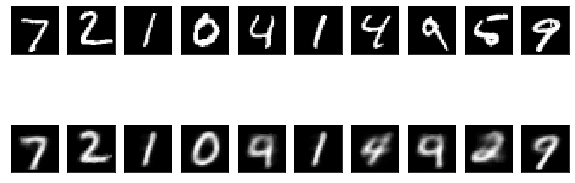

In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = generator.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

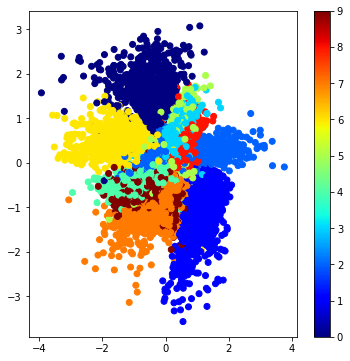

In [12]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.set_cmap('jet')
plt.colorbar()

plt.show()

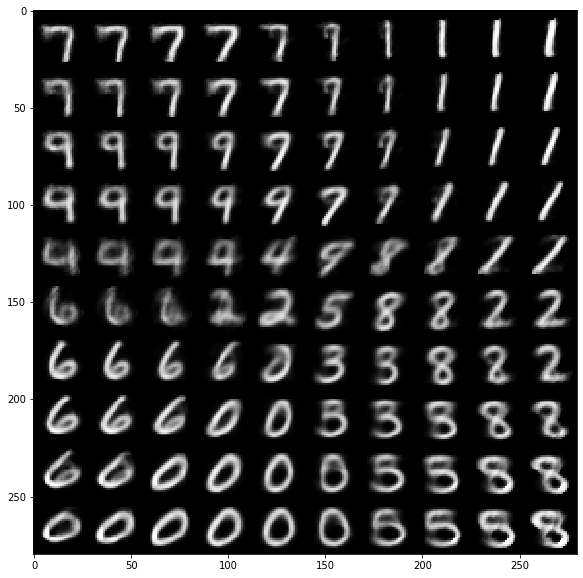

In [13]:
# display a 2D manifold of the digits
n = 10  # figure with nxn digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])*0.1 
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.gray()
plt.show()

# Excercises


* Can you repeat the excercise with larger latent space (for the mean and standard deviations of the Guassian)?
* Create a VAE model with several layers (deep AE)
* Change the reconstruction loss to binary cross entropy

## Deeper network

In [14]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()    

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

In [0]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = [512, 128, 32]
batch_size = 100
latent_dim = 2
epochs = 100

x = Input(batch_shape=(batch_size, original_dim))
h = x
for dim in intermediate_dim:
    h = Dense(dim, activation='relu')(h)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])
decoder_h = []
input_dec = z
for i, dim in enumerate(reversed(intermediate_dim)):
    l = Dense(dim, activation='relu')
    input_dec = l(input_dec)
    decoder_h.append(l)
    

decoder_mean = Dense(original_dim, activation='sigmoid')
x_decoded_mean = decoder_mean(input_dec)
# Overall VAE model, for reconstruction and training
vae = Model(x, x_decoded_mean)

print(vae.summary())
# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(x, z_mean)

# Generator model, generate new data given latent variable z
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_input
for i, _ in enumerate(reversed(intermediate_dim)):
    _h_decoded = decoder_h[i](_h_decoded)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

def vae_loss(y_true, y_pred):
    """ 
    Calculate loss = reconstruction loss + 
    KL loss for each data in minibatch 
    """
    reconstruction_loss = K.sum(K.square(x-x_decoded_mean), axis=-1)
    # D_KL(Q(z|X) || P(z|X)); 
    # calculate in closed form as both dist. are Gaussian
    # This term forces the distribution of \mu and \std in the laent space to be gaussian
    kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.square(K.exp(z_log_sigma)), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)
vae.compile(optimizer='rmsprop', loss=vae_loss)

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (100, 784)           0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (100, 512)           401920      input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (100, 128)           65664       dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (100, 32)            4128        dense_7[0][0]                    
____________________________________________________________________________________________

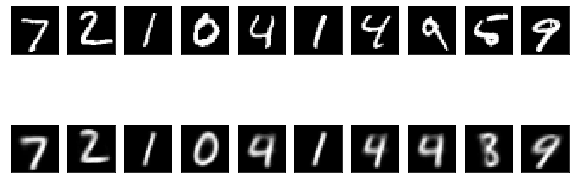

In [18]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = generator.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

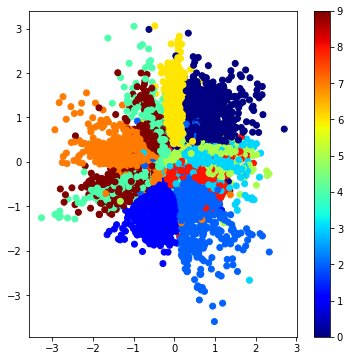

In [19]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.set_cmap('jet')
plt.colorbar()

plt.show()

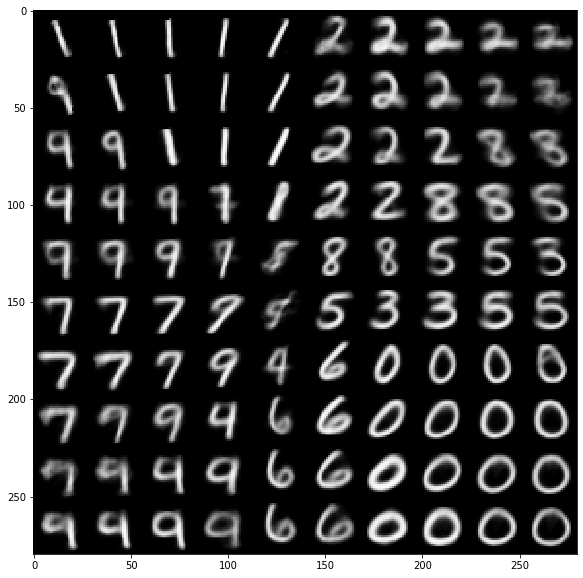

In [20]:
# display a 2D manifold of the digits
n = 10  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 0.1
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.gray()
plt.show()

## Deeper network + larger latent space

In [21]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()    

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

In [0]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [24]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = [512, 128, 32]
batch_size = 100
latent_dim = 8
epochs = 100

x = Input(batch_shape=(batch_size, original_dim))
h = x
for dim in intermediate_dim:
    h = Dense(dim, activation='relu')(h)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])
decoder_h = []
input_dec = z
for i, dim in enumerate(reversed(intermediate_dim)):
    l = Dense(dim, activation='relu')
    input_dec = l(input_dec)
    decoder_h.append(l)
    

decoder_mean = Dense(original_dim, activation='sigmoid')
x_decoded_mean = decoder_mean(input_dec)
# Overall VAE model, for reconstruction and training
vae = Model(x, x_decoded_mean)

print(vae.summary())
# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(x, z_mean)

# Generator model, generate new data given latent variable z
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_input
for i, _ in enumerate(reversed(intermediate_dim)):
    _h_decoded = decoder_h[i](_h_decoded)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

def vae_loss(y_true, y_pred):
    """ 
    Calculate loss = reconstruction loss + 
    KL loss for each data in minibatch 
    """
    reconstruction_loss = K.sum(K.square(x-x_decoded_mean), axis=-1)
    # D_KL(Q(z|X) || P(z|X)); 
    # calculate in closed form as both dist. are Gaussian
    # This term forces the distribution of \mu and \std in the laent space to be gaussian
    kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.square(K.exp(z_log_sigma)), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)
vae.compile(optimizer='rmsprop', loss=vae_loss)

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (100, 784)           0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (100, 512)           401920      input_5[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (100, 128)           65664       dense_15[0][0]                   
__________________________________________________________________________________________________
dense_17 (Dense)                (100, 32)            4128        dense_16[0][0]                   
____________________________________________________________________________________________

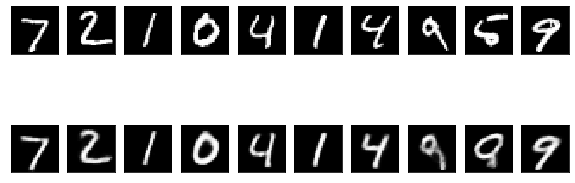

In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = generator.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

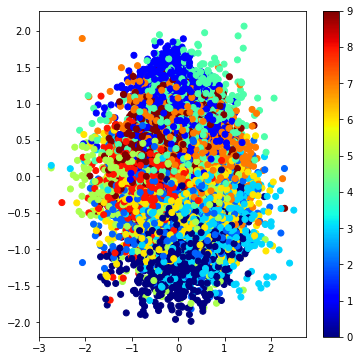

In [26]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 6], x_test_encoded[:, 7], c=y_test)
plt.set_cmap('jet')
plt.colorbar()

plt.show()

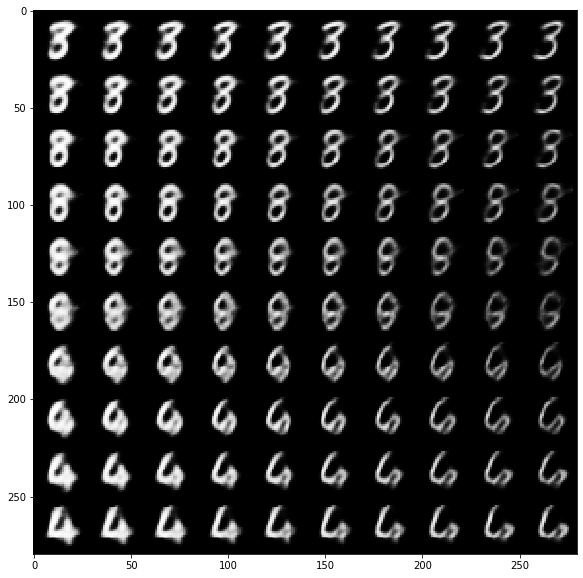

In [27]:
# display a 2D manifold of the digits
n = 10  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]) * 0.1
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.gray()
plt.show()